<a href="https://colab.research.google.com/github/MOOwuttichai/BSC_DPDM2023/blob/main/Understanding_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# library

In [47]:
import numpy as np
import pandas as pd
import os

#load data

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
data_from_gdrive =pd.read_excel('/content/drive/MyDrive/BSC-dpdm23_flie/kh-muulkhwaamt-ngkaaraerngngaantaamokhrngkaarthiiaidrabsngesrimkaarlngthun-mi-y-2563.xls',header = 2)

In [50]:
#data_from_gdrive

In [51]:
from google.colab import  auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ =  default()

gc = gspread.authorize(creds)

In [52]:
gsht = gc.open_by_key('1BQTviTHwApKSOcgqwWE80fZBp2w5m9S8fJfzYY6Lbew')

In [53]:
worksheet2 = gsht.worksheet("มิ.ย. 2563")
row = worksheet2.get_all_values()
data_from_gsheet= pd.DataFrame.from_records(row)

In [54]:
data_from_gsheet.columns = data_from_gsheet.iloc[2]#set header
data_from_gsheet= data_from_gsheet.iloc[3:].reset_index().iloc[:,1:]#
data_from_gsheet.head()

2,เลขที่คำขอ,เลขที่บัตรส่งเสริม,ชื่อบริษัทภาษาไทย,สถานที่ตั้งโรงงาน,เบอร์โทรศัพท์,เบอร์โทรสาร,จังหวัด,ประเภทกิจการ,ชื่อผลิตภัณฑ์,อุตสาหการ,...,สาขาการตลาด,สาขาการจัดการ,สาขาเลขานุการ,สาขาคอมพิวเตอร์ธุรกิจ,สาขาการเงินการธนาคาร,สาขาพัฒนาชุมชน-การสหกรณ์,พาณิชยการ,สาขาอุตสาหกรรมการท่องเที่ยว,สาขาศิลปศาสตร์,อาชีวศึกษาบริหารธุรกิจ อื่นๆ
0,610707,62-0422-1-04-1-0,กรุงเทพ ไดอ์แคสซ์ติ้ง แอนด์ อินแจ๊กชั่น,"46/1,46/2 หมู่ที่ 12 ถนนบางพลี-บางนาตราด ต.บาง...",02-3373078-84,02-3373589-90,สมุทรปราการ,[6.6],Plastic Parts for Automotive,0,...,0,0,0,0,0,0,0,0,0,0
1,620660,63-0107-1-00-1-0,เจ้าพระยา คาร์บอน,ต.เขาล้าน อ.ทับสะแก ประจวบคีรีขันธ์ 77130,081-8412110,,ประจวบคีรีขันธ์,[1.15],Activated Carbon,0,...,1,1,0,0,0,0,0,0,0,0
2,610182,63-0101-1-00-1-0,อาร์ต ออฟ เบคกิ้ง,111/21 หมู่ที่ 2 ต.ท่าจีน อ.เมือง สมุทรสาคร 74000,034-440157,,สมุทรสาคร,[1.17],Frozen Pizza Disc/Pizza Dough,1,...,0,0,0,0,0,2,3,0,0,0
3,620318,63-0080-1-00-0-0,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),700/864 หมู่ที่ 1 ต.พานทอง อ.พานทอง ชลบุรี 20160,,,ชลบุรี,[4.8.17],Temperature Sensor,0,...,0,0,0,0,0,0,0,0,0,0
4,620185,63-0079-1-00-0-0,เอ็นจีเค สปาร์คปลั๊กส์ (ประเทศไทย),700/864 หมู่ที่ 1 ต.พานทอง อ.พานทอง ชลบุรี 20160,,,ชลบุรี,[4.8.17],Oxygen Sensor,2,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data_from_gsheet.describe()

2,เลขที่คำขอ,เลขที่บัตรส่งเสริม,ชื่อบริษัทภาษาไทย,สถานที่ตั้งโรงงาน,เบอร์โทรศัพท์,เบอร์โทรสาร,จังหวัด,ประเภทกิจการ,ชื่อผลิตภัณฑ์,อุตสาหการ,...,สาขาการตลาด,สาขาการจัดการ,สาขาเลขานุการ,สาขาคอมพิวเตอร์ธุรกิจ,สาขาการเงินการธนาคาร,สาขาพัฒนาชุมชน-การสหกรณ์,พาณิชยการ,สาขาอุตสาหกรรมการท่องเที่ยว,สาขาศิลปศาสตร์,อาชีวศึกษาบริหารธุรกิจ อื่นๆ
count,660,660,660,660,660,660,660,660,660,660,...,660,660,660,660,660,660,660,660,660,660
unique,660,660,558,603,388,74,55,138,392,14,...,12,14,5,11,6,3,10,8,4,12
top,610707,62-0422-1-04-1-0,โซลาร์ เอนเนอร์ยี่ โซไซตี้,98/92-94 ถนนกะตะ ต.กะรน อ.เมือง ภูเก็ต 83100,,,ชลบุรี,[7.1.1.2],Electricity Power from Solar Rooftop,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,1,21,8,223,582,111,104,86,504,...,553,544,609,587,629,658,639,644,655,641


#load new_csv from google drive

In [56]:
shopping_data = pd.read_csv("/content/drive/MyDrive/BSC-dpdm23_flie/customer_shopping_data.csv")

In [57]:
shopping_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [58]:
shopping_data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [59]:
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [60]:
shopping_data.isnull().any()

invoice_no        False
customer_id       False
gender            False
age               False
category          False
quantity          False
price             False
payment_method    False
invoice_date      False
shopping_mall     False
dtype: bool

# Basic stat


### how many payment methods

In [62]:
set(shopping_data['payment_method'])

{'Cash', 'Credit Card', 'Debit Card'}

In [63]:
shopping_data.value_counts('payment_method')

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
dtype: int64

In [64]:
shopping_data.groupby('payment_method').count()

,invoice_no,customer_id,gender,age,category,quantity,price,invoice_date,shopping_mall
payment_method,,,,,,,,,
Cash,44447,44447,44447,44447,44447,44447,44447,44447,44447
Credit Card,34931,34931,34931,34931,34931,34931,34931,34931,34931
Debit Card,20079,20079,20079,20079,20079,20079,20079,20079,20079


### Average PURCHASE Amouunt (USD) of customer age above 40 yr?

In [65]:
x=shopping_data[shopping_data['age']>40].describe()

In [66]:
x

,age,quantity,price
count,55167.000000,55167.000000,55167.000000
mean,54.976743,3.003426,690.853136
std,8.374926,1.412343,942.539041
min,41.000000,1.000000,5.230000
25%,48.000000,2.000000,45.450000
50%,55.000000,3.000000,203.300000
75%,62.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


# Visualization

# histogaem

In [68]:
from matplotlib import pyplot as plt

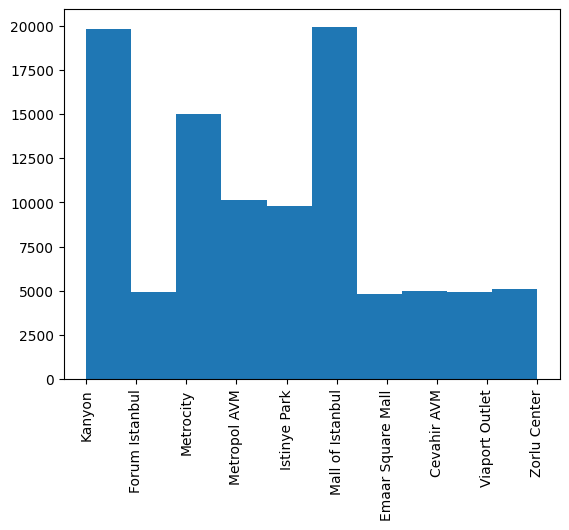

In [89]:
histoutput=plt.hist(shopping_data['shopping_mall'])
tk = plt.xticks(rotation ='vertical') ;

In [84]:
shopping_data[shopping_data['shopping_mall'] == 'Mall of Istanbul'].count()

invoice_no        19943
customer_id       19943
gender            19943
age               19943
category          19943
quantity          19943
price             19943
payment_method    19943
invoice_date      19943
shopping_mall     19943
dtype: int64

In [85]:
histoutput[0]

array([19823.,  4947., 15011., 10161.,  9781., 19943.,  4811.,  4991.,
        4914.,  5075.])

In [86]:
tk[-1]

[Text(0, 0, 'Kanyon'),
 Text(1, 0, 'Forum Istanbul'),
 Text(2, 0, 'Metrocity'),
 Text(3, 0, 'Metropol AVM'),
 Text(4, 0, 'Istinye Park'),
 Text(5, 0, 'Mall of Istanbul'),
 Text(6, 0, 'Emaar Square Mall'),
 Text(7, 0, 'Cevahir AVM'),
 Text(8, 0, 'Viaport Outlet'),
 Text(9, 0, 'Zorlu Center')]

In [88]:
tk[-1][0].get_text()

'Kanyon'

##Scatter

### is there a tend in age vs price?

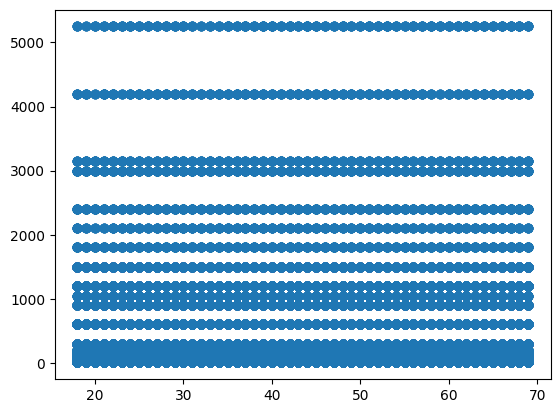

In [93]:
plt.scatter(shopping_data['age'],shopping_data['price'],alpha=0.5)

### is there a tend in age vs quantity?

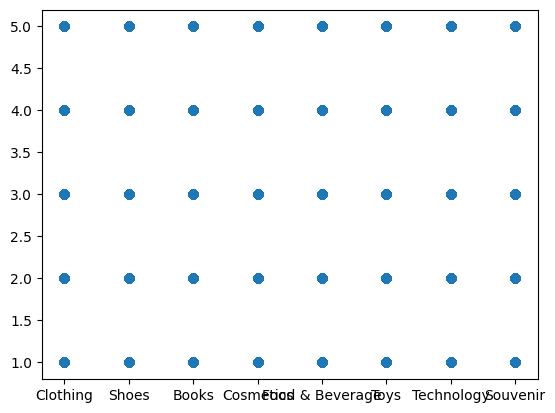

In [96]:
plt.scatter(shopping_data['age'],shopping_data['quantity'],alpha=0.5)

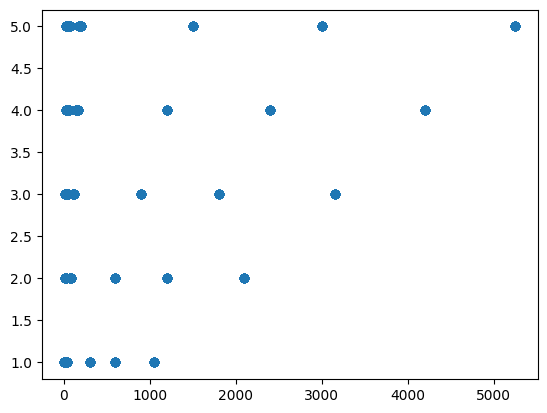

In [101]:
plt.scatter(shopping_data['price'],shopping_data['quantity'],alpha=0.05)

## boxplot

### Are there out

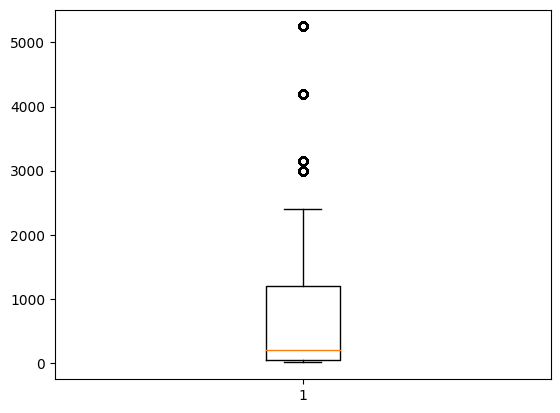

In [105]:
bpre = plt.boxplot(shopping_data['price'])

In [110]:
l= bpre['fliers'][0].get_ydata()

In [111]:
len(l)

5024

## pie chart

### ration of male and female customers

In [121]:
Male=len(shopping_data[shopping_data['gender']=='Male'])
female=len(shopping_data[shopping_data['gender']=='Female'])

([<matplotlib.patches.Wedge at 0x7fe4beaa7c10>,
 [Text(0.3335610586300834, 1.0482065732314305, 'Male'),
  Text(-0.33356096048989947, -1.0482066044616662, 'female')])

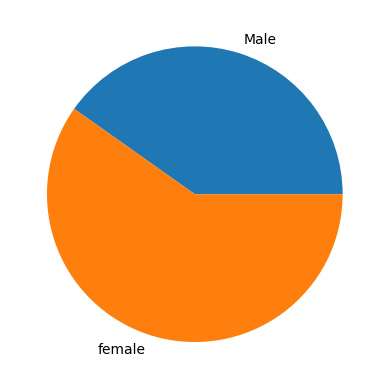

In [122]:
plt.pie([Male,female],labels = ['Male','female'],)

## Bar chart

###stacked

#### เปรียบเทียบชนิดสินค้าที่ซื้อในเเต่ละ shopping mall เเบบ ภาพรวมของเเต่ละ shopping mall

In [123]:
set(shopping_data['category'])

{'Books',
 'Clothing',
 'Cosmetics',
 'Food & Beverage',
 'Shoes',
 'Souvenir',
 'Technology',
 'Toys'}

In [124]:
set(shopping_data['shopping_mall'])

{'Cevahir AVM',
 'Emaar Square Mall',
 'Forum Istanbul',
 'Istinye Park',
 'Kanyon',
 'Mall of Istanbul',
 'Metrocity',
 'Metropol AVM',
 'Viaport Outlet',
 'Zorlu Center'}

In [127]:
x=shopping_data.groupby(['shopping_mall','category'])['quantity'].sum().unstack()

In [130]:
x

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
shopping_mall,,,,,,,,
Cevahir AVM,792,5180,2174,2293,1473,708,780,1549
Emaar Square Mall,730,5038,2272,2109,1452,726,795,1379
Forum Istanbul,756,5239,2342,2072,1459,775,673,1536
Istinye Park,1368,10165,4396,4478,3010,1566,1438,3044
Kanyon,2969,20513,9155,8695,6065,3025,3050,5985
Mall of Istanbul,3099,20813,9193,8878,6112,2921,3067,6031
Metrocity,2271,15729,6700,6764,4349,2197,2273,4611
Metropol AVM,1468,10552,4569,4586,3237,1586,1396,3136
Viaport Outlet,720,5101,2279,2186,1471,651,784,1524


In [139]:
x['Souvenir'][0]

708

In [131]:
x['Books']

shopping_mall
Cevahir AVM           792
Emaar Square Mall     730
Forum Istanbul        756
Istinye Park         1368
Kanyon               2969
Mall of Istanbul     3099
Metrocity            2271
Metropol AVM         1468
Viaport Outlet        720
Zorlu Center          809
Name: Books, dtype: int64

In [133]:
x.reset_index()['shopping_mall']

0          Cevahir AVM
1    Emaar Square Mall
2       Forum Istanbul
3         Istinye Park
4               Kanyon
5     Mall of Istanbul
6            Metrocity
7         Metropol AVM
8       Viaport Outlet
9         Zorlu Center
Name: shopping_mall, dtype: object

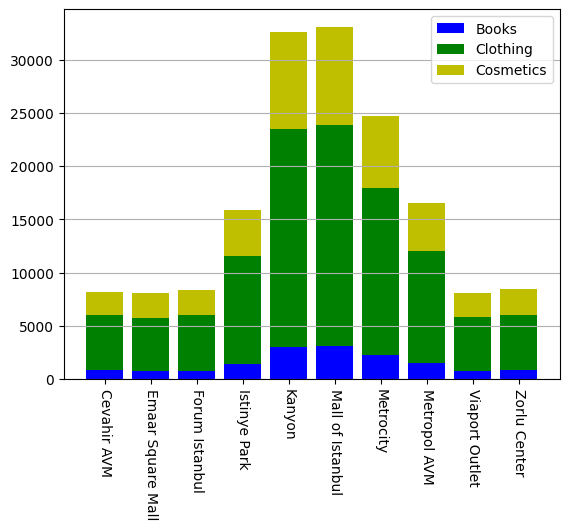

In [137]:
plt.bar([1,2,3,4,5,6,7,8,9,10],x['Books'],color ='b',label='Books')
plt.bar([1,2,3,4,5,6,7,8,9,10],x['Clothing'],bottom = x['Books'],color ='g',label='Clothing')
plt.bar([1,2,3,4,5,6,7,8,9,10],x['Cosmetics'],bottom = x['Books']+x['Clothing'],color ='y',label='Cosmetics')
plt.xticks([1,2,3,4,5,6,7,8,9,10],x.reset_index()['shopping_mall'],rotation=270 )
plt.grid(True,axis='y')
plt.legend();

###group

#### เปรียบเทียบชนิดสินค้าที่ซื้อในเเต่ละ shopping mall เป็นเเต่ละ shopping mall (books-souvenir-Technology)

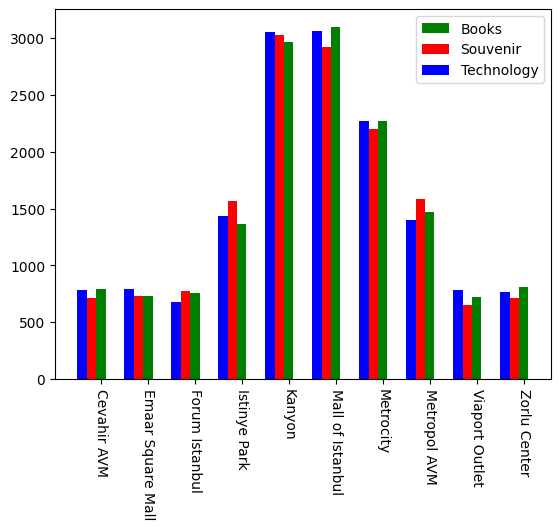

In [145]:
width = 0.2#กำหนดความกว้างของแท่ง
#1-width เขิยบทาง ซ้าย 1 แท่ง เพื่อความสวยงาม

plt.bar([1,2,3,4,5,6,7,8,9,10],x['Books'],width,color='g',label='Books')
plt.bar([1-width, 2-width,3-width,4-width,5-width,6-width,7-width,8-width,9-width,10-width],x['Souvenir'],width,color='r',label='Souvenir') # bar 2
plt.bar([1-width*2, 2-width*2,3-width*2,4-width*2,5-width*2,6-width*2,7-width*2,8-width*2,9-width*2,10-width*2],x['Technology'],width,color='b',label='Technology') # bar 3

plt.xticks([1,2,3,4,5,6,7,8,9,10],x.reset_index()['shopping_mall'],rotation=270 )
plt.legend();

# Distance - Similarity

## z-score